In [1]:
# Importing 

In [2]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [4]:
# Uploading File

In [5]:
data = pd.read_csv('/Users/dchrobak/Desktop/NFL_Fantasy_Fiie.csv')

In [6]:
# Exploriing the data

In [7]:
data.describe

<bound method NDFrame.describe of       Year    RK     ID                         NAME TEAM       SALARY  POS  \
0     2021   853  15478                   A.J. Bouye  CAR   3380556.00   CB   
1     2017    59  15478                   A.J. Bouye  JAX  13500000.00   CB   
2     2016    45  15478                   A.J. Bouye  HOU   1671000.00   CB   
3     2015   307  15478                   A.J. Bouye  HOU    672028.00   CB   
4     2020    98  21042                   A.J. Brown  TEN    751926.00   WR   
5     2019   160  21042                   A.J. Brown  TEN   2625812.00   WR   
6     2021   938  21881                 A.J. Epenesa  BUF   2619050.00   DE   
7     2020   231  21881                 A.J. Epenesa  BUF   2619050.00   DE   
8     2021   258  12845                   A.J. Green  ARI   7250000.00   WR   
9     2021   878  22046                   A.J. Green  CLE   7250000.00   CB   
10    2020   434  22046                   A.J. Green  CLE  18196490.00   CB   
11    2015    94  

In [8]:
data.columns

Index(['Year', 'RK', 'ID', 'NAME', 'TEAM', 'SALARY', 'POS', 'GMS', 'PASS_YDS',
       'PASS_TD', 'PASS_INT', 'RUSH_YDS', 'RUSH_TD', 'RUSH_REC', 'REC_YDS',
       'REC_TD', 'DEF_SCK', 'DEF_INT', 'DEF_FF', 'DEF_FR', 'FPTS_G', 'FPTS'],
      dtype='object')

In [9]:
data.head()

,Year,RK,ID,NAME,TEAM,SALARY,POS,GMS,PASS_YDS,PASS_TD,PASS_INT,RUSH_YDS,RUSH_TD,RUSH_REC,REC_YDS,REC_TD,DEF_SCK,DEF_INT,DEF_FF,DEF_FR,FPTS_G,FPTS
0,2021,853,15478,A.J. Bouye,CAR,3380556.00,CB,10,0,0,0.0,0,0,0,0,0,0.0,0,1,0,3.4,33.5
1,2017,59,15478,A.J. Bouye,JAX,13500000.00,CB,3,0,0,0.0,0,0,0,0,0,0.0,0,0,0,5.7,17.0
2,2016,45,15478,A.J. Bouye,HOU,1671000.00,CB,2,0,0,0.0,0,0,0,0,0,0.0,2,1,0,10.5,21.0
3,2015,307,15478,A.J. Bouye,HOU,672028.00,CB,1,0,0,0.0,0,0,0,0,0,0.0,0,0,0,1.0,1.0
4,2020,98,21042,A.J. Brown,TEN,751926.00,WR,1,0,0,0.0,0,0,6,83,1,0.0,0,0,0,14.3,14.3


In [10]:
data['POS'].unique()

array(['CB', 'WR', 'DE', 'OLB', 'SS', 'LS', 'DT', 'RB', 'FB', 'QB', 'DL',
       'NT', 'TE', 'K', 'FS', 'ILB', 'LB', 'S', 'DB'], dtype=object)

In [11]:
# Standardation and clean up

In [12]:
data = data.rename(columns=str.lower)

In [13]:
data.head()

,year,rk,id,name,team,salary,pos,gms,pass_yds,pass_td,pass_int,rush_yds,rush_td,rush_rec,rec_yds,rec_td,def_sck,def_int,def_ff,def_fr,fpts_g,fpts
0,2021,853,15478,A.J. Bouye,CAR,3380556.00,CB,10,0,0,0.0,0,0,0,0,0,0.0,0,1,0,3.4,33.5
1,2017,59,15478,A.J. Bouye,JAX,13500000.00,CB,3,0,0,0.0,0,0,0,0,0,0.0,0,0,0,5.7,17.0
2,2016,45,15478,A.J. Bouye,HOU,1671000.00,CB,2,0,0,0.0,0,0,0,0,0,0.0,2,1,0,10.5,21.0
3,2015,307,15478,A.J. Bouye,HOU,672028.00,CB,1,0,0,0.0,0,0,0,0,0,0.0,0,0,0,1.0,1.0
4,2020,98,21042,A.J. Brown,TEN,751926.00,WR,1,0,0,0.0,0,0,6,83,1,0.0,0,0,0,14.3,14.3


In [14]:
data['year'].unique()

array([2021, 2017, 2016, 2015, 2020, 2019, 2018, 2014])

In [15]:
# Checking nulls

In [16]:
data.isna().sum()

year        0
rk          0
id          0
name        0
team        0
salary      0
pos         0
gms         0
pass_yds    0
pass_td     0
pass_int    1
rush_yds    0
rush_td     0
rush_rec    0
rec_yds     0
rec_td      0
def_sck     0
def_int     0
def_ff      0
def_fr      0
fpts_g      0
fpts        0
dtype: int64

In [17]:
data = data.dropna()

In [18]:
data.isna().sum()

year        0
rk          0
id          0
name        0
team        0
salary      0
pos         0
gms         0
pass_yds    0
pass_td     0
pass_int    0
rush_yds    0
rush_td     0
rush_rec    0
rec_yds     0
rec_td      0
def_sck     0
def_int     0
def_ff      0
def_fr      0
fpts_g      0
fpts        0
dtype: int64

In [19]:
data.head()

,year,rk,id,name,team,salary,pos,gms,pass_yds,pass_td,pass_int,rush_yds,rush_td,rush_rec,rec_yds,rec_td,def_sck,def_int,def_ff,def_fr,fpts_g,fpts
0,2021,853,15478,A.J. Bouye,CAR,3380556.00,CB,10,0,0,0.0,0,0,0,0,0,0.0,0,1,0,3.4,33.5
1,2017,59,15478,A.J. Bouye,JAX,13500000.00,CB,3,0,0,0.0,0,0,0,0,0,0.0,0,0,0,5.7,17.0
2,2016,45,15478,A.J. Bouye,HOU,1671000.00,CB,2,0,0,0.0,0,0,0,0,0,0.0,2,1,0,10.5,21.0
3,2015,307,15478,A.J. Bouye,HOU,672028.00,CB,1,0,0,0.0,0,0,0,0,0,0.0,0,0,0,1.0,1.0
4,2020,98,21042,A.J. Brown,TEN,751926.00,WR,1,0,0,0.0,0,0,6,83,1,0.0,0,0,0,14.3,14.3


In [20]:
# Dropping visibly unnesecary columns

In [21]:
data.drop(['id', 'salary'], axis=1, inplace=True)

In [22]:
data.head()

,year,rk,name,team,pos,gms,pass_yds,pass_td,pass_int,rush_yds,rush_td,rush_rec,rec_yds,rec_td,def_sck,def_int,def_ff,def_fr,fpts_g,fpts
0,2021,853,A.J. Bouye,CAR,CB,10,0,0,0.0,0,0,0,0,0,0.0,0,1,0,3.4,33.5
1,2017,59,A.J. Bouye,JAX,CB,3,0,0,0.0,0,0,0,0,0,0.0,0,0,0,5.7,17.0
2,2016,45,A.J. Bouye,HOU,CB,2,0,0,0.0,0,0,0,0,0,0.0,2,1,0,10.5,21.0
3,2015,307,A.J. Bouye,HOU,CB,1,0,0,0.0,0,0,0,0,0,0.0,0,0,0,1.0,1.0
4,2020,98,A.J. Brown,TEN,WR,1,0,0,0.0,0,0,6,83,1,0.0,0,0,0,14.3,14.3


In [23]:
data.dtypes

year          int64
rk            int64
name         object
team         object
pos          object
gms           int64
pass_yds      int64
pass_td       int64
pass_int    float64
rush_yds      int64
rush_td       int64
rush_rec      int64
rec_yds       int64
rec_td        int64
def_sck     float64
def_int       int64
def_ff        int64
def_fr        int64
fpts_g      float64
fpts        float64
dtype: object

In [24]:
data.value_counts()

year  rk    name                         team  pos  gms  pass_yds  pass_td  pass_int  rush_yds  rush_td  rush_rec  rec_yds  rec_td  def_sck  def_int  def_ff  def_fr  fpts_g  fpts   
2014  1     Tom Brady                    NE    QB   3    921       10       4.0        10       1        0          0       0       0.0      0        0       0        25.3    75.84     1
2020  103   Leonard Floyd                LAR   OLB  2    0         0        0.0        0        0        0          0       0       2.0      0        0       0        6.9     13.80     1
      104   Jaire Alexander              GB    CB   2    0         0        0.0        0        0        0          0       0       0.0      2        0       0        6.8     13.50     1
      107   Michael Thomas               NO    WR   2    0         0        0.0        0        0        5          73      1       0.0      0        0       0        6.6     13.30     1
      108   Justin Tucker                BAL   K    2    0         0  

In [25]:
data.count()

year        3922
rk          3922
name        3922
team        3922
pos         3922
gms         3922
pass_yds    3922
pass_td     3922
pass_int    3922
rush_yds    3922
rush_td     3922
rush_rec    3922
rec_yds     3922
rec_td      3922
def_sck     3922
def_int     3922
def_ff      3922
def_fr      3922
fpts_g      3922
fpts        3922
dtype: int64

In [26]:
data.count('columns')

0       20
1       20
2       20
3       20
4       20
5       20
6       20
7       20
8       20
9       20
10      20
11      20
12      20
13      20
14      20
15      20
16      20
17      20
18      20
19      20
20      20
21      20
22      20
23      20
24      20
25      20
26      20
27      20
28      20
29      20
30      20
31      20
32      20
33      20
34      20
35      20
36      20
37      20
38      20
39      20
40      20
41      20
42      20
43      20
44      20
45      20
46      20
47      20
48      20
49      20
50      20
51      20
52      20
53      20
54      20
55      20
56      20
57      20
58      20
59      20
60      20
61      20
62      20
63      20
64      20
65      20
66      20
67      20
68      20
69      20
70      20
71      20
72      20
73      20
74      20
75      20
76      20
77      20
78      20
79      20
80      20
81      20
82      20
83      20
84      20
85      20
86      20
87      20
88      20
89      20
90      20

### After reviewing the model it was neccesary to drop corrolated columns in order to achieve better accuracy

In [27]:
data.reset_index(drop = True, inplace = True)

In [28]:
data.head()

,year,rk,name,team,pos,gms,pass_yds,pass_td,pass_int,rush_yds,rush_td,rush_rec,rec_yds,rec_td,def_sck,def_int,def_ff,def_fr,fpts_g,fpts
0,2021,853,A.J. Bouye,CAR,CB,10,0,0,0.0,0,0,0,0,0,0.0,0,1,0,3.4,33.5
1,2017,59,A.J. Bouye,JAX,CB,3,0,0,0.0,0,0,0,0,0,0.0,0,0,0,5.7,17.0
2,2016,45,A.J. Bouye,HOU,CB,2,0,0,0.0,0,0,0,0,0,0.0,2,1,0,10.5,21.0
3,2015,307,A.J. Bouye,HOU,CB,1,0,0,0.0,0,0,0,0,0,0.0,0,0,0,1.0,1.0
4,2020,98,A.J. Brown,TEN,WR,1,0,0,0.0,0,0,6,83,1,0.0,0,0,0,14.3,14.3


In [29]:
data.shape

(3922, 20)

In [30]:
numericals = data.select_dtypes(include = np.number)
categoricals = data.select_dtypes(include = np.object)

In [31]:
numericals.head()

,year,rk,gms,pass_yds,pass_td,pass_int,rush_yds,rush_td,rush_rec,rec_yds,rec_td,def_sck,def_int,def_ff,def_fr,fpts_g,fpts
0,2021,853,10,0,0,0.0,0,0,0,0,0,0.0,0,1,0,3.4,33.5
1,2017,59,3,0,0,0.0,0,0,0,0,0,0.0,0,0,0,5.7,17.0
2,2016,45,2,0,0,0.0,0,0,0,0,0,0.0,2,1,0,10.5,21.0
3,2015,307,1,0,0,0.0,0,0,0,0,0,0.0,0,0,0,1.0,1.0
4,2020,98,1,0,0,0.0,0,0,6,83,1,0.0,0,0,0,14.3,14.3


In [32]:
categoricals.head()

,name,team,pos
0,A.J. Bouye,CAR,CB
1,A.J. Bouye,JAX,CB
2,A.J. Bouye,HOU,CB
3,A.J. Bouye,HOU,CB
4,A.J. Brown,TEN,WR


In [33]:
numericals.shape

(3922, 17)

In [34]:
categoricals.shape

(3922, 3)

In [35]:
for column_name in data.columns:
    print (column_name)

year
rk
name
team
pos
gms
pass_yds
pass_td
pass_int
rush_yds
rush_td
rush_rec
rec_yds
rec_td
def_sck
def_int
def_ff
def_fr
fpts_g
fpts


In [36]:
numericals.isna().sum()

year        0
rk          0
gms         0
pass_yds    0
pass_td     0
pass_int    0
rush_yds    0
rush_td     0
rush_rec    0
rec_yds     0
rec_td      0
def_sck     0
def_int     0
def_ff      0
def_fr      0
fpts_g      0
fpts        0
dtype: int64

In [37]:
categoricals.isna().sum()

name    0
team    0
pos     0
dtype: int64

In [38]:
# Dropping Name it was producing a negative R2

<!-- I dropped 'name' here. There were too many values in the column, alover 2000, it was prodcing a -R2.  -->

In [39]:
data.drop(['name'], axis=1, inplace=True)

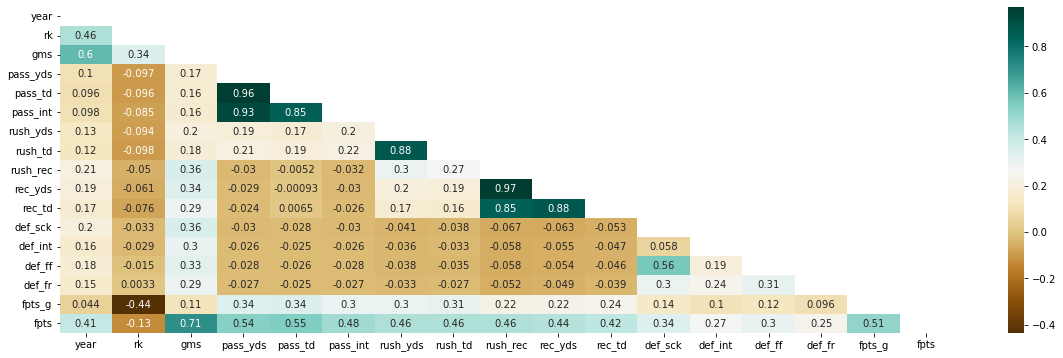

In [40]:
correlations_matrix = numericals.corr()
mask = np.triu(np.ones_like(numericals.corr(), dtype=bool))
fig, ax = plt.subplots(figsize= (20, 6))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap= 'BrBG')
plt.show()

## Originally I had included passing yards here as well as part of my collumn drop. However after getting a near perfect model, it was clear the model was overfitting. I added passing yards

In [41]:
data.drop(['pass_td', 'rush_td', 'rec_yds', 'rec_td'], axis=1, inplace=True),

(None,)

In [42]:
data.reset_index(drop = True, inplace = True)

In [43]:
data.head()

,year,rk,team,pos,gms,pass_yds,pass_int,rush_yds,rush_rec,def_sck,def_int,def_ff,def_fr,fpts_g,fpts
0,2021,853,CAR,CB,10,0,0.0,0,0,0.0,0,1,0,3.4,33.5
1,2017,59,JAX,CB,3,0,0.0,0,0,0.0,0,0,0,5.7,17.0
2,2016,45,HOU,CB,2,0,0.0,0,0,0.0,2,1,0,10.5,21.0
3,2015,307,HOU,CB,1,0,0.0,0,0,0.0,0,0,0,1.0,1.0
4,2020,98,TEN,WR,1,0,0.0,0,6,0.0,0,0,0,14.3,14.3


In [44]:
data_t = data.describe()

In [45]:
data_t.transpose()

,count,mean,std,min,25%,50%,75%,max
year,3922.0,2017.964814,2.438802,2014.00,2016.00,2018.0,2020.000,2021.00
rk,3922.0,350.828404,348.767077,1.00,141.25,279.0,366.000,1918.00
gms,3922.0,4.275880,5.164015,1.00,1.00,2.0,3.000,17.00
pass_yds,3922.0,40.515808,333.408088,0.00,0.00,0.0,0.000,5316.00
pass_int,3922.0,0.130546,1.076891,0.00,0.00,0.0,0.000,17.00
rush_yds,3922.0,13.713666,82.471464,-9.00,0.00,0.0,0.000,1811.00
rush_rec,3922.0,2.933197,10.864571,0.00,0.00,0.0,0.000,145.00
def_sck,3922.0,0.316165,1.270429,0.00,0.00,0.0,0.000,22.50
def_int,3922.0,0.106323,0.491878,0.00,0.00,0.0,0.000,11.00
def_ff,3922.0,0.104539,0.451453,0.00,0.00,0.0,0.000,8.00


In [46]:
iqrlist = list(data.select_dtypes('number').columns)

In [47]:
for i in iqrlist:
    IQR = np.percentile(data[i], 75) - np.percentile(data[i], 25)
    upper_limit = np.percentile(data[i],75)+1.5*IQR
    lower_limit = np.percentile(data[i],25)-1.5*IQR

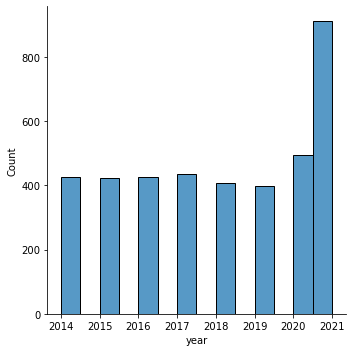

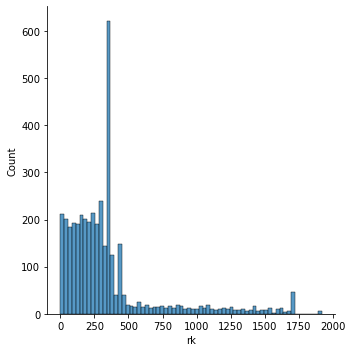

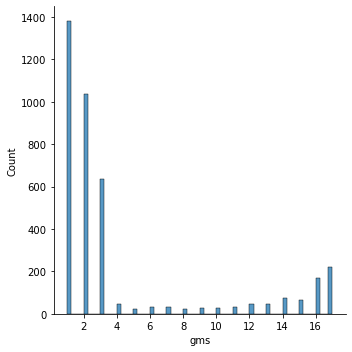

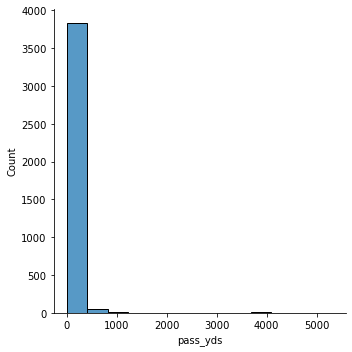

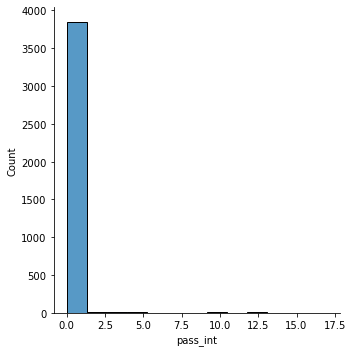

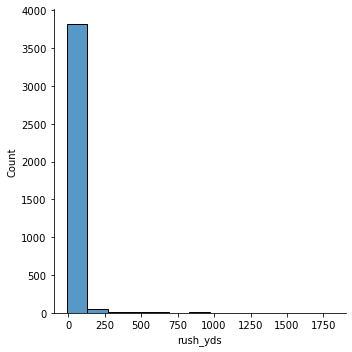

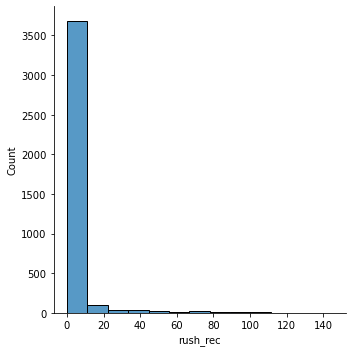

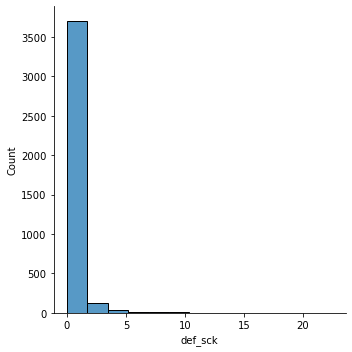

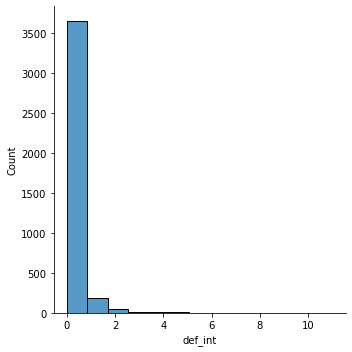

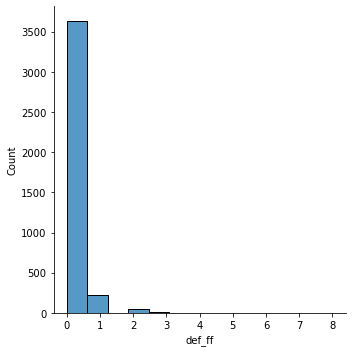

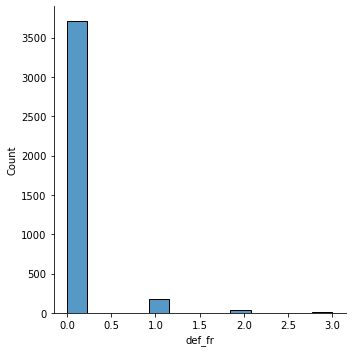

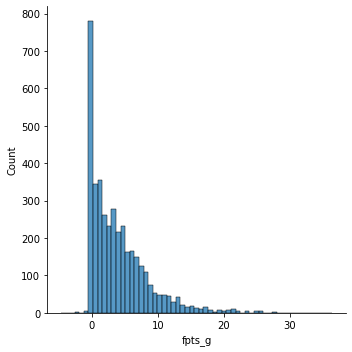

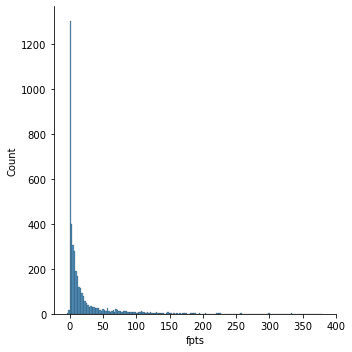

In [48]:
for i in iqrlist:
    sns.displot(data[i])

In [49]:
# Iqr for each numerical column

In [50]:
for i in list(data.select_dtypes('number').columns):
        print(i + ': ' + str(data[i].value_counts().values[0]/data[i].value_counts().values.sum()))

year: 0.23227944926058133
rk: 0.034166241713411524
gms: 0.35211626721060685
pass_yds: 0.9581845996940337
pass_int: 0.9722080571137175
rush_yds: 0.8546659867414584
rush_rec: 0.7695053544110148
def_sck: 0.8684344722080571
def_int: 0.9309026007139215
def_ff: 0.9258031616522182
def_fr: 0.9464558898521163
fpts_g: 0.1891891891891892
fpts: 0.18663946965833758


In [51]:
# Checking percentage values of '0's in each column

In [52]:
for i in list(data.select_dtypes('number').columns):
    if data[i].value_counts().values[0]/data[i].value_counts().values.sum() > .95:
        print(i + ': ' + str(data[i].value_counts().values[0]/data[i].value_counts().values.sum()))
    else:
        continue

pass_yds: 0.9581845996940337
pass_int: 0.9722080571137175


In [58]:
cat = data.select_dtypes(object).columns

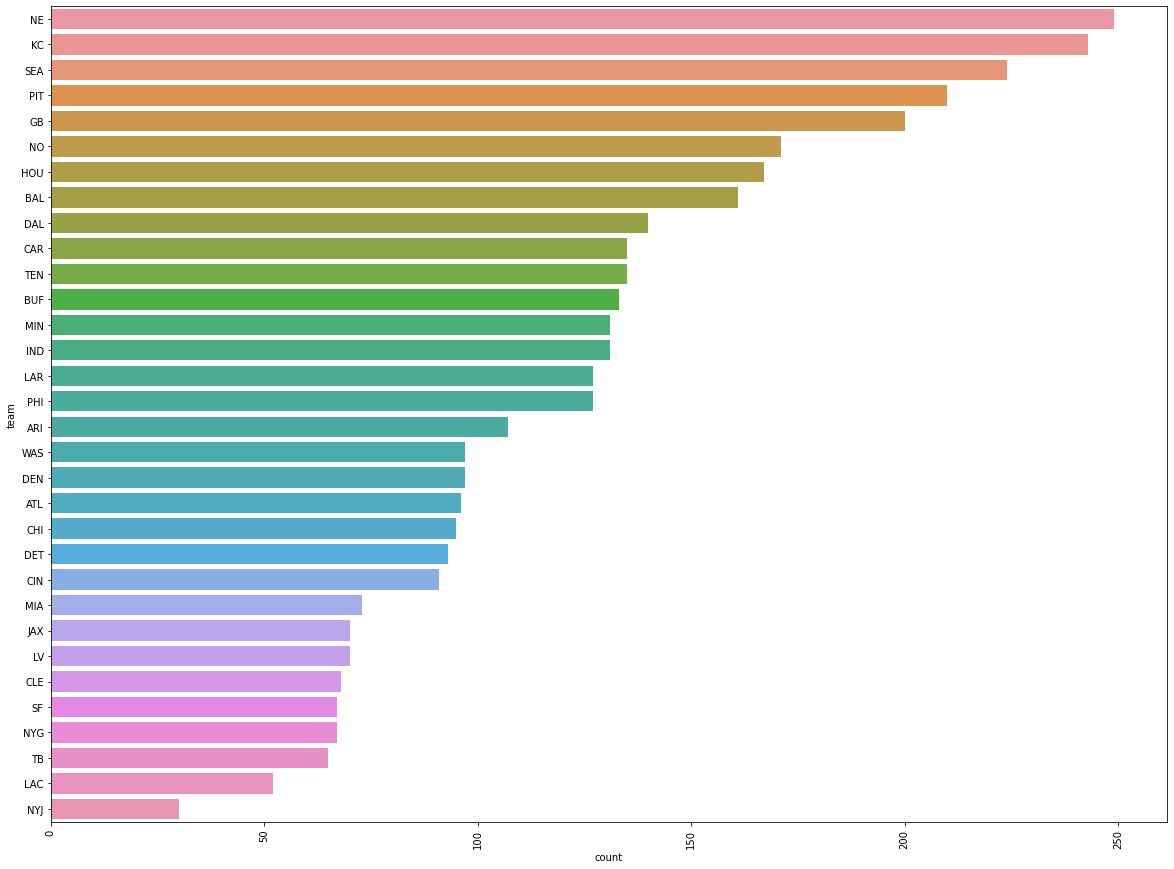

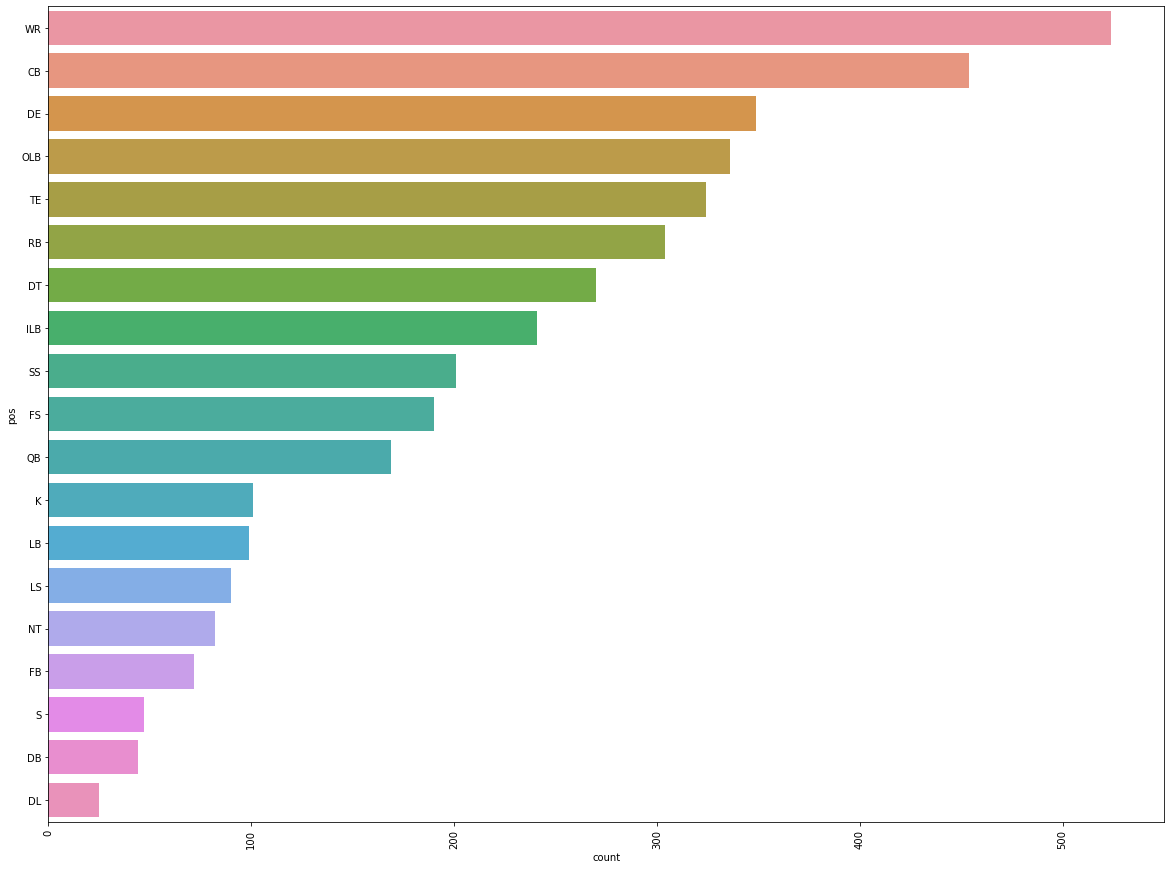

In [59]:
for col in cat:
    fig, ax = plt.subplots(figsize = (20,15))
    ax = sns.countplot(y = col, data=data,order=data[col].value_counts().index)
    ax.tick_params(axis='x', labelrotation = 90)
    plt.show()

In [ ]:
# Cattegoricals look great. Only 2 to drop

In [ ]:
data.drop(['pass_yds', 'pass_int'], axis=1, inplace=True)
data.columns

In [ ]:
data.reset_index(drop = True, inplace = True)

In [ ]:
y = data['fpts']
x = data = data.drop(['fpts'], axis = 1)

In [ ]:
numericals = data.select_dtypes(include = np.number)
categoricals = data.select_dtypes(include = np.object)

In [ ]:
encoded = OneHotEncoder().fit_transform(categoricals).toarray()
encoded = pd.DataFrame(encoded)

In [ ]:
normalized = Normalizer().fit_transform(numericals)
normalized = pd.DataFrame(normalized)

In [ ]:
normalized

In [ ]:
# encoded

In [ ]:
x_features = np.concatenate((normalized, encoded), axis = 1)
x_features = pd.DataFrame(x_features)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size = 0.75, random_state = 1000)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
model = LinearRegression()  
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
x_test.head()

In [ ]:
predictions

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, predictions))

Prior to cleaing after MVP model. The model was producing phenomanly, it was a sign for worry as it was over fitting with an R2 over 99 %.

In [ ]:
from scipy.stats import boxcox
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.classifier import EnsembleVoteClassifier
# from mlxtend.data import iris_data

In [ ]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)
x_standardized

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numericals)
x_normalized = transformer.transform(numericals)
x_normalized

In [ ]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numericals)
x_min_max = transformer.transform(numericals)
x_min_max

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False)
sns.despine(left=True)

col = (1)

sns.distplot(numericals.values[:,col], kde=True, color="b", ax=axes[0])
sns.distplot(x_standardized[:,col], kde=True, color="b", ax=axes[1])
sns.distplot(x_min_max[:,col], kde=True, color="b", ax=axes[2])
sns.distplot(x_normalized[:,col], kde=True, color="b", ax=axes[3])

axes[0].set_title(f'{numericals.columns[col]}')
axes[1].set_title(f'{numericals.columns[col]} (Standardized)')
axes[2].set_title(f'{numericals.columns[col]} (Min-Max)')
axes[3].set_title(f'{numericals.columns[col]} (Normalized)')

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
score = model.score(x_test, y_test)

from sklearn import linear_model
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
#predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,25):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))


plt.figure(figsize=(10,6))
plt.plot(range(2,25),scores,color = 'black',linestyle='solid', 
         marker='o',markerfacecolor='blue', markersize=20)
plt.title('Accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor() 

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test) 

In [ ]:
y_pred

In [ ]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

In [ ]:
# Now to Hypertune

In [ ]:
# 200, 500, 1000, 1500 = n estimators

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# random_forest_tuning = RandomForestRegressor()
# param_grid = {
#    'n_estimators': [200, 500, 1000, 1500],
#     'min_samples_split': [2,20],
#     'min_samples_leaf': [1,10],
#    'max_depth' : [4,5,6,7,8],
#    'criterion' :['mse', 'mae',]
# }
# GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
# GSCV.fit(x_train, y_train)
# GSCV.best_params_ 

In [ ]:
# This takes 2-3 hours to run

Results:
    
    max_depth = 8
    min_samples_leaf = 1
    min_samples_split = 2
    n_estimators = 500
    

In [ ]:
random_forest = RandomForestRegressor(max_depth = 8, min_samples_leaf = 1, min_samples_split=2, n_estimators=500)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

In [ ]:
# 98 % Super satfied with this

In [ ]:
# new_pred = random_forest.predict(x_new)